# AI vs Human texts

Done by: Sebastian Sarasti

# Load basic libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import sys
import os

In [3]:
sys.path.append('../src')

## Load environment variables

In [4]:
from dotenv import load_dotenv

In [5]:
load_dotenv('../.env')

True

# Data processing

Load data to process

In [6]:
df = pd.read_parquet('../data/AI_Human_cleaned.parquet')

Get the environment variables to register the data transformers

In [7]:
MLFLOW_URI = os.getenv('MLFLOW_URI')
MLFLOW_EXPERIMENT_NAME = "AI-Human-Classification"
MLFLOW_EXPERIMENT_RUNNAME = "Preprocessors"

Transform data to get numerical features for the classification

In [8]:
from utils.text_features import FeatureTextExtraction

In [9]:
feature_extractor = FeatureTextExtraction(MLFLOW_URI, MLFLOW_EXPERIMENT_NAME, MLFLOW_EXPERIMENT_RUNNAME)

In [10]:
df_final = feature_extractor.fit_transform(df)

Verificar el balanceamiento de las clases

In [ ]:
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='generated', ylabel='Percent'>

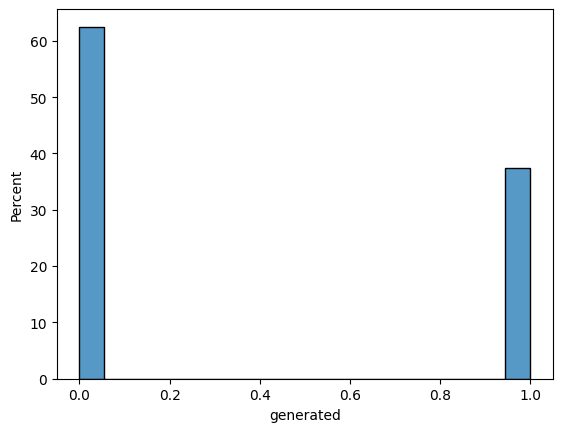

In [ ]:
sns.histplot(data = df_final, x = "generated", stat = "percent")